# 📊 Lojistik Regresyon Performans Değerlendirmesi

Bu notebook, farklı özellik seçim yöntemleriyle oluşturulan veri kümeleri üzerinde Lojistik Regresyon modelinin performansını değerlendirir.

## İçerik
1. Kütüphanelerin Yüklenmesi
2. Veri Kümelerinin Yüklenmesi
3. K-Fold Cross Validation ile Eğitim
4. Aşırı Öğrenme Kontrolü ve İyileştirme
5. Test Değerlendirmesi
6. Sonuç Tablosu
7. Karışıklık Matrisi
8. Sonuç ve Yorumlar

---
## 1. Kütüphanelerin Yüklenmesi

In [2]:
# Standart kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Helper modüllerini içe aktar
from helpers import (
    # Data Loader
    get_all_datasets,
    split_train_test,
    
    # Model Trainer
    create_logistic_regression_model,
    cross_validate_model,
    detect_overfitting,
    apply_regularization,
    train_final_model,
    
    # Evaluation Metrics
    calculate_metrics,
    create_confusion_matrix,
    get_classification_report,
    
    # Report Generator
    generate_results_table,
    save_results_to_csv,
    generate_markdown_report,
    plot_confusion_matrix,
    save_confusion_matrix_plot,
    get_results_dir
)

# Ayarlar
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

print("✓ Kütüphaneler başarıyla yüklendi!")

✓ Kütüphaneler başarıyla yüklendi!


---
## 2. Veri Kümelerinin Yüklenmesi

In [3]:
# Tüm veri kümelerini yükle
datasets = get_all_datasets()

VERİ KÜMELERİ YÜKLENİYOR

📂 Tüm Özellikler
✓ Veri kümesi yüklendi: processed_dataset.csv
  Boyut: (39644, 59)
  Özellik sayısı: 58
  Sınıf dağılımı: 0 → 18490, 1 → 21154

📂 Filtreleme (Pearson)
✓ Veri kümesi yüklendi: filter_method_selected_dataset.csv
  Boyut: (39644, 16)
  Özellik sayısı: 15
  Sınıf dağılımı: 0 → 18490, 1 → 21154

📂 Sarmalayıcı (RFE)
✓ Veri kümesi yüklendi: wrapper_method_selected_dataset.csv
  Boyut: (39644, 16)
  Özellik sayısı: 15
  Sınıf dağılımı: 0 → 18490, 1 → 21154

📂 Gömülü (Random Forest)
✓ Veri kümesi yüklendi: embedded_method_selected_dataset.csv
  Boyut: (39644, 16)
  Özellik sayısı: 15
  Sınıf dağılımı: 0 → 18490, 1 → 21154

✓ Toplam 4 veri kümesi yüklendi.


In [4]:
# Veri kümelerini eğitim/test olarak böl
print("\n" + "=" * 60)
print("EĞİTİM/TEST BÖLÜMLEMESİ (%80/%20)")
print("=" * 60)

for key, data in datasets.items():
    print(f"\n📂 {data['name']}")
    X_train, X_test, y_train, y_test = split_train_test(
        data['X'], data['y'], 
        test_size=0.2, 
        random_state=42
    )
    
    # Datasets dict'ine ekle
    datasets[key]['X_train'] = X_train
    datasets[key]['X_test'] = X_test
    datasets[key]['y_train'] = y_train
    datasets[key]['y_test'] = y_test


EĞİTİM/TEST BÖLÜMLEMESİ (%80/%20)

📂 Tüm Özellikler
  Eğitim seti: 31715 örnek
  Test seti: 7929 örnek

📂 Filtreleme (Pearson)
  Eğitim seti: 31715 örnek
  Test seti: 7929 örnek

📂 Sarmalayıcı (RFE)
  Eğitim seti: 31715 örnek
  Test seti: 7929 örnek

📂 Gömülü (Random Forest)
  Eğitim seti: 31715 örnek
  Test seti: 7929 örnek


---
## 3. K-Fold Cross Validation ile Eğitim

Her veri kümesi için 5-fold cross validation yapılacak.

In [5]:
# Cross-validation sonuçlarını sakla
cv_results = {}

print("=" * 70)
print("5-FOLD CROSS VALIDATION")
print("=" * 70)

for key, data in datasets.items():
    print(f"\n{'='*60}")
    print(f"📊 {data['name']} ({data['feature_count']} özellik)")
    print("="*60)
    
    # Varsayılan model
    model = create_logistic_regression_model(C=1.0)
    
    # Cross-validation
    cv_result = cross_validate_model(
        model, 
        data['X_train'], 
        data['y_train'], 
        cv=5
    )
    
    cv_results[key] = cv_result
    
    # Sonuçları yazdır
    print(f"\nFold sonuçları:")
    print(f"  Eğitim skorları:    {cv_result['train_scores']}")
    print(f"  Validasyon skorları: {cv_result['val_scores']}")
    print(f"\nOrtalamalar:")
    print(f"  Eğitim:     {cv_result['train_mean']:.4f} (±{cv_result['train_std']:.4f})")
    print(f"  Validasyon: {cv_result['val_mean']:.4f} (±{cv_result['val_std']:.4f})")

5-FOLD CROSS VALIDATION

📊 Tüm Özellikler (58 özellik)

Fold sonuçları:
  Eğitim skorları:    [0.65548636 0.65524988 0.6558805  0.65422513 0.65450102]
  Validasyon skorları: [0.65221504 0.65331862 0.64780073 0.6544222  0.65584108]

Ortalamalar:
  Eğitim:     0.6551 (±0.0006)
  Validasyon: 0.6527 (±0.0027)

📊 Filtreleme (Pearson) (15 özellik)

Fold sonuçları:
  Eğitim skorları:    [0.64330758 0.64311052 0.64460823 0.64208576 0.64141573]
  Validasyon skorları: [0.63786852 0.64338641 0.63424247 0.6468548  0.65221504]

Ortalamalar:
  Eğitim:     0.6429 (±0.0011)
  Validasyon: 0.6429 (±0.0064)

📊 Sarmalayıcı (RFE) (15 özellik)

Fold sonuçları:
  Eğitim skorları:    [0.64638184 0.64468706 0.64823427 0.64555415 0.64697304]
  Validasyon skorları: [0.64811603 0.65363393 0.6355037  0.64764307 0.64401703]

Ortalamalar:
  Eğitim:     0.6464 (±0.0012)
  Validasyon: 0.6458 (±0.0060)

📊 Gömülü (Random Forest) (15 özellik)

Fold sonuçları:
  Eğitim skorları:    [0.62628094 0.62533501 0.62801513 0.6275

---
## 4. Aşırı Öğrenme Kontrolü ve İyileştirme

Eğitim ve validasyon skorları arasındaki fark %5'ten büyükse aşırı öğrenme tespit edilmiş kabul edilir ve regularization uygulanır.

In [6]:
# Aşırı öğrenme kontrolü ve iyileştirme
overfitting_info = {}
final_models = {}

print("=" * 70)
print("AŞIRI ÖĞRENME KONTROLÜ VE İYİLEŞTİRME")
print("=" * 70)

for key, data in datasets.items():
    print(f"\n{'='*60}")
    print(f"🔍 {data['name']}")
    print("="*60)
    
    cv_result = cv_results[key]
    
    # Aşırı öğrenme tespiti
    is_overfitting, gap = detect_overfitting(
        cv_result['train_scores'],
        cv_result['val_scores'],
        threshold=0.05
    )
    
    overfitting_info[data['name']] = {
        'detected': is_overfitting,
        'gap': gap
    }
    
    if is_overfitting:
        print(f"⚠️ Aşırı öğrenme tespit edildi! (Fark: {gap:.4f})")
        
        # Regularization uygula
        best_model, reg_info = apply_regularization(
            data['X_train'], 
            data['y_train'],
            cv=5
        )
        
        final_models[key] = {
            'model': best_model,
            'C': reg_info['best_C'],
            'cv_results': reg_info['cv_results']
        }
        
        overfitting_info[data['name']]['best_C'] = reg_info['best_C']
        
    else:
        print(f"✓ Aşırı öğrenme yok. (Fark: {gap:.4f})")
        
        final_models[key] = {
            'model': create_logistic_regression_model(C=1.0),
            'C': 1.0,
            'cv_results': cv_result
        }

AŞIRI ÖĞRENME KONTROLÜ VE İYİLEŞTİRME

🔍 Tüm Özellikler
✓ Aşırı öğrenme yok. (Fark: 0.0023)

🔍 Filtreleme (Pearson)
✓ Aşırı öğrenme yok. (Fark: -0.0000)

🔍 Sarmalayıcı (RFE)
✓ Aşırı öğrenme yok. (Fark: 0.0006)

🔍 Gömülü (Random Forest)
✓ Aşırı öğrenme yok. (Fark: 0.0014)


In [7]:
# Aşırı öğrenme özeti
print("\n" + "=" * 60)
print("AŞIRI ÖĞRENME ÖZETİ")
print("=" * 60)

overfitting_df = pd.DataFrame([
    {
        'Yöntem': method,
        'Aşırı Öğrenme': '⚠️ Evet' if info['detected'] else '✅ Hayır',
        'Eğitim-Validasyon Farkı': f"{info['gap']:.4f}",
        'Uygulanan C': info.get('best_C', 1.0)
    }
    for method, info in overfitting_info.items()
])

display(overfitting_df)


AŞIRI ÖĞRENME ÖZETİ


,Yöntem,Aşırı Öğrenme,Eğitim-Validasyon Farkı,Uygulanan C
0,Tüm Özellikler,✅ Hayır,0.0023,1.0
1,Filtreleme (Pearson),✅ Hayır,-0.0000,1.0
2,Sarmalayıcı (RFE),✅ Hayır,0.0006,1.0
3,Gömülü (Random Forest),✅ Hayır,0.0014,1.0


---
## 5. Test Değerlendirmesi

%20 test seti üzerinde final modelleri değerlendirilecek.

In [8]:
# Final model eğitimi ve test değerlendirmesi
results = {}

print("=" * 70)
print("FINAL MODEL EĞİTİMİ VE TEST DEĞERLENDİRMESİ")
print("=" * 70)

for key, data in datasets.items():
    print(f"\n{'='*60}")
    print(f"🎯 {data['name']}")
    print("="*60)
    
    model_info = final_models[key]
    
    # Final modeli eğit
    trained_model, scaler, training_time = train_final_model(
        model_info['model'],
        data['X_train'],
        data['y_train']
    )
    
    # Test seti üzerinde tahmin
    X_test_scaled = scaler.transform(data['X_test'])
    y_pred = trained_model.predict(X_test_scaled)
    
    # Metrikleri hesapla
    metrics = calculate_metrics(data['y_test'], y_pred)
    
    # Sonuçları sakla
    results[key] = {
        'name': data['name'],
        'feature_count': data['feature_count'],
        'accuracy': metrics['accuracy'],
        'f1_score': metrics['f1_score'],
        'precision': metrics['precision'],
        'recall': metrics['recall'],
        'training_time': training_time,
        'C': model_info['C'],
        'model': trained_model,
        'scaler': scaler,
        'y_pred': y_pred,
        'y_test': data['y_test']
    }
    
    # Sonuçları yazdır
    print(f"\n📊 Test Sonuçları:")
    print(f"  Accuracy:  {metrics['accuracy']:.4f} ({metrics['accuracy']*100:.2f}%)")
    print(f"  F1-Score:  {metrics['f1_score']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall:    {metrics['recall']:.4f}")
    print(f"  C değeri:  {model_info['C']}")

FINAL MODEL EĞİTİMİ VE TEST DEĞERLENDİRMESİ

🎯 Tüm Özellikler
  Eğitim süresi: 0.1823 saniye

📊 Test Sonuçları:
  Accuracy:  0.6552 (65.52%)
  F1-Score:  0.6544
  Precision: 0.6544
  Recall:    0.6552
  C değeri:  1.0

🎯 Filtreleme (Pearson)
  Eğitim süresi: 0.0168 saniye

📊 Test Sonuçları:
  Accuracy:  0.6431 (64.31%)
  F1-Score:  0.6413
  Precision: 0.6421
  Recall:    0.6431
  C değeri:  1.0

🎯 Sarmalayıcı (RFE)
  Eğitim süresi: 0.0347 saniye

📊 Test Sonuçları:
  Accuracy:  0.6510 (65.10%)
  F1-Score:  0.6502
  Precision: 0.6502
  Recall:    0.6510
  C değeri:  1.0

🎯 Gömülü (Random Forest)
  Eğitim süresi: 0.0221 saniye

📊 Test Sonuçları:
  Accuracy:  0.6278 (62.78%)
  F1-Score:  0.6253
  Precision: 0.6266
  Recall:    0.6278
  C değeri:  1.0


---
## 6. Sonuç Tablosu

In [9]:
# Sonuç tablosu oluştur
results_df = generate_results_table(results)

print("\n" + "=" * 80)
print("SONUÇ TABLOSU")
print("=" * 80)

display(results_df)


SONUÇ TABLOSU


,Yöntem,Özellik Sayısı,Doğruluk (Accuracy),F1-Skoru,Eğitim Süresi (s),C (Regularization)
0,Tüm Özellikler,58,0.6552,0.6544,0.1823,1.0
1,Filtreleme (Pearson),15,0.6431,0.6413,0.0168,1.0
2,Sarmalayıcı (RFE),15,0.6510,0.6502,0.0347,1.0
3,Gömülü (Random Forest),15,0.6278,0.6253,0.0221,1.0


In [10]:
# En başarılı yöntemi bul
best_method_key = max(results.keys(), key=lambda k: results[k]['accuracy'])
best_result = results[best_method_key]

print(f"\n🏆 En Başarılı Yöntem: {best_result['name']}")
print(f"   Accuracy: {best_result['accuracy']:.4f}")
print(f"   F1-Score: {best_result['f1_score']:.4f}")


🏆 En Başarılı Yöntem: Tüm Özellikler
   Accuracy: 0.6552
   F1-Score: 0.6544


In [11]:
# Sonuçları CSV'ye kaydet
save_results_to_csv(results, "logistic_regression_results.csv")

✓ Klasör oluşturuldu: c:\Users\kayra\OneDrive\Üniversite\Dersler\Doktora\Dönem 1\Makine Öğrenmesi\ödev2\kodlar\evaluate_performance\helpers\..\results
✓ Sonuçlar kaydedildi: c:\Users\kayra\OneDrive\Üniversite\Dersler\Doktora\Dönem 1\Makine Öğrenmesi\ödev2\kodlar\evaluate_performance\helpers\..\results\logistic_regression_results.csv


'c:\\Users\\kayra\\OneDrive\\Üniversite\\Dersler\\Doktora\\Dönem 1\\Makine Öğrenmesi\\ödev2\\kodlar\\evaluate_performance\\helpers\\..\\results\\logistic_regression_results.csv'

---
## 7. Karışıklık Matrisi

En başarılı yöntem için karışıklık matrisi görselleştirilecek.


📋 Karışıklık Matrisi - Tüm Özellikler

[[2236 1462]
 [1272 2959]]


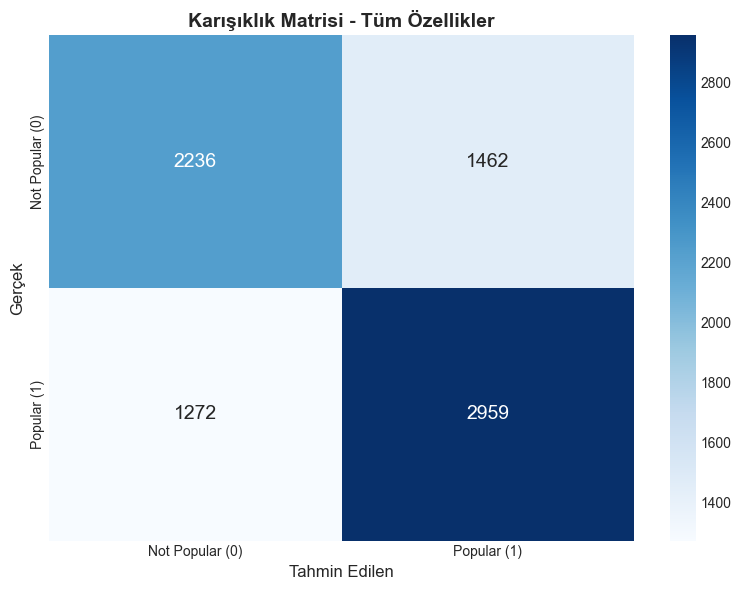

In [12]:
# En başarılı yöntem için karışıklık matrisi
cm = create_confusion_matrix(best_result['y_test'], best_result['y_pred'])

print(f"\n📋 Karışıklık Matrisi - {best_result['name']}")
print("=" * 50)
print(f"\n{cm}")

# Görselleştir
fig = plot_confusion_matrix(
    cm, 
    title=f"Karışıklık Matrisi - {best_result['name']}"
)
plt.show()

In [13]:
# Karışıklık matrisini kaydet
save_confusion_matrix_plot(
    cm, 
    filename="best_method_confusion_matrix.png",
    title=f"Karışıklık Matrisi - {best_result['name']}"
)

✓ Karışıklık matrisi kaydedildi: c:\Users\kayra\OneDrive\Üniversite\Dersler\Doktora\Dönem 1\Makine Öğrenmesi\ödev2\kodlar\evaluate_performance\helpers\..\results\best_method_confusion_matrix.png


'c:\\Users\\kayra\\OneDrive\\Üniversite\\Dersler\\Doktora\\Dönem 1\\Makine Öğrenmesi\\ödev2\\kodlar\\evaluate_performance\\helpers\\..\\results\\best_method_confusion_matrix.png'

In [14]:
# Detaylı sınıflandırma raporu
print(f"\n📊 Sınıflandırma Raporu - {best_result['name']}")
print("=" * 60)
print(get_classification_report(best_result['y_test'], best_result['y_pred']))


📊 Sınıflandırma Raporu - Tüm Özellikler
                 precision    recall  f1-score   support

Not Popular (0)       0.64      0.60      0.62      3698
    Popular (1)       0.67      0.70      0.68      4231

       accuracy                           0.66      7929
      macro avg       0.65      0.65      0.65      7929
   weighted avg       0.65      0.66      0.65      7929



### Tüm Yöntemler İçin Karışıklık Matrisleri

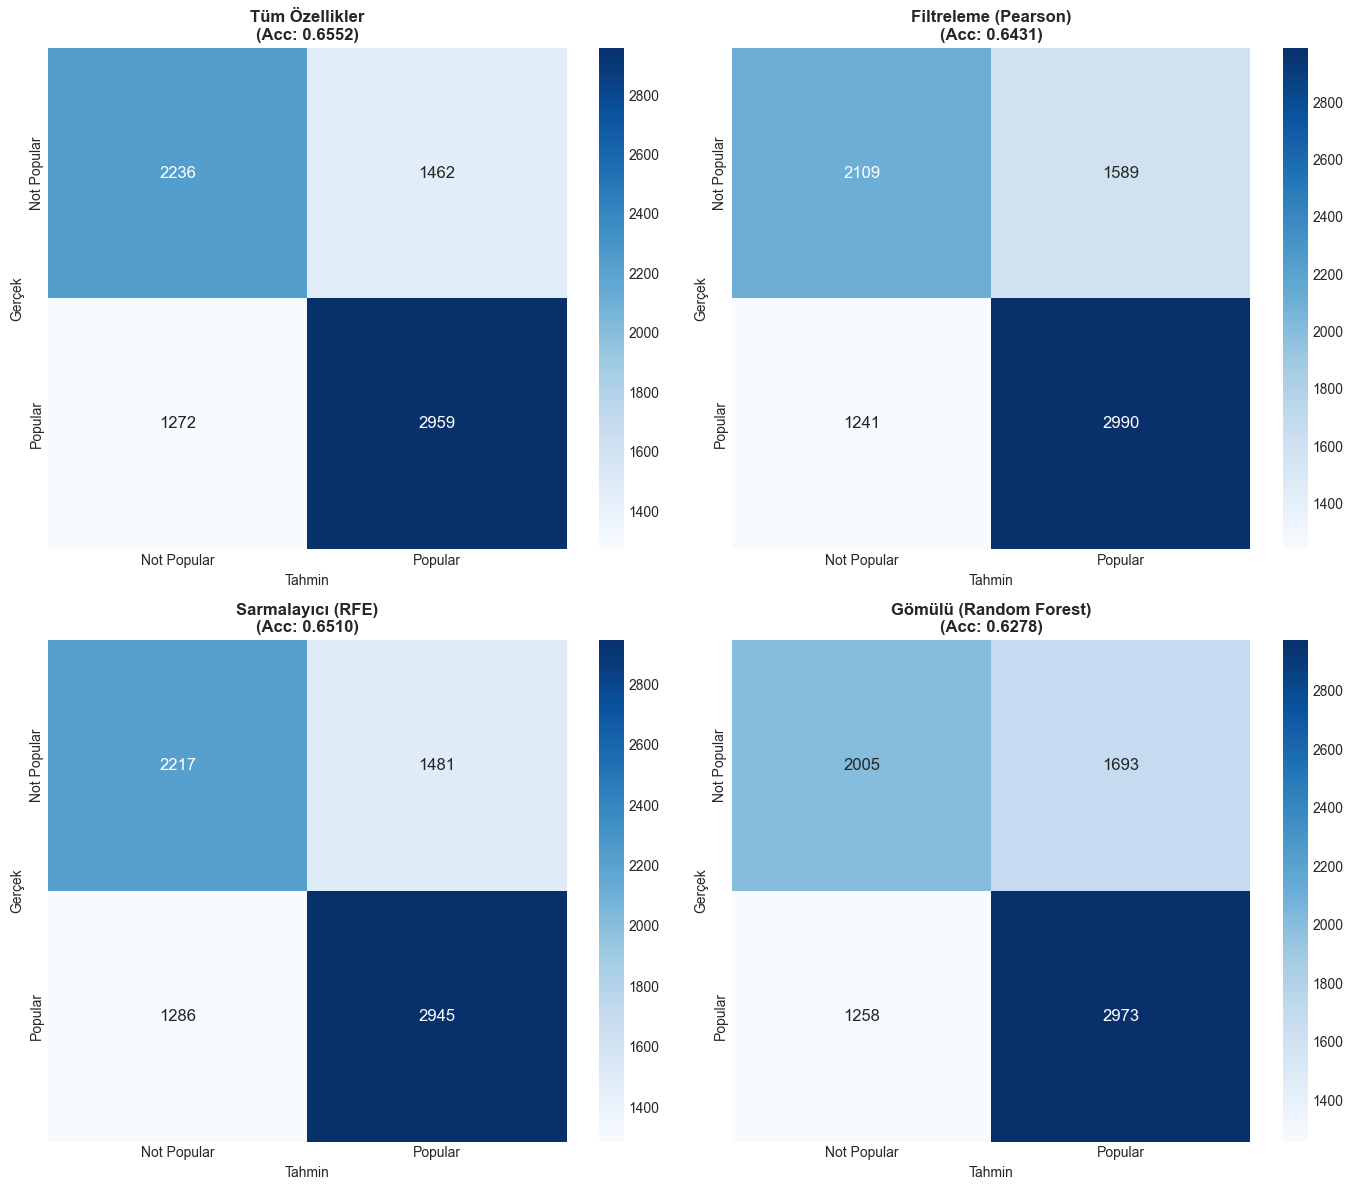


✓ Tüm karışıklık matrisleri kaydedildi.


In [15]:
# Tüm yöntemler için yan yana karışıklık matrisleri
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (key, result) in enumerate(results.items()):
    cm = create_confusion_matrix(result['y_test'], result['y_pred'])
    
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Blues',
        xticklabels=['Not Popular', 'Popular'],
        yticklabels=['Not Popular', 'Popular'],
        ax=axes[idx],
        annot_kws={'size': 12}
    )
    
    axes[idx].set_title(f"{result['name']}\n(Acc: {result['accuracy']:.4f})", fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Tahmin', fontsize=10)
    axes[idx].set_ylabel('Gerçek', fontsize=10)

plt.tight_layout()
plt.savefig(f"{get_results_dir()}/all_confusion_matrices.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Tüm karışıklık matrisleri kaydedildi.")

---
## 8. Yöntem Karşılaştırma Grafiği

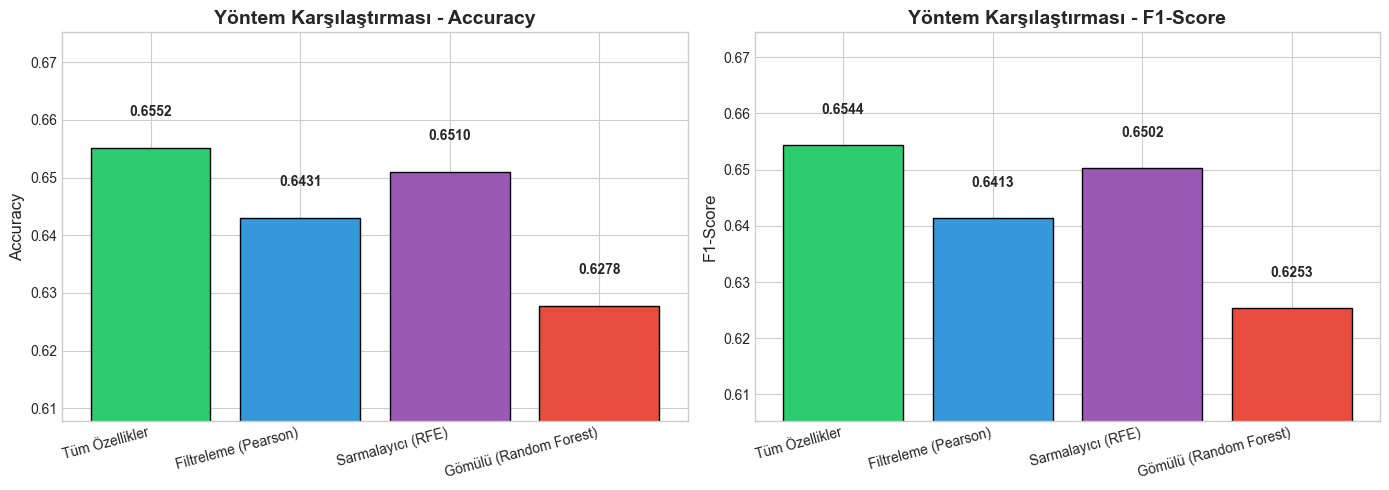


✓ Karşılaştırma grafiği kaydedildi.


In [16]:
# Accuracy karşılaştırma grafiği
methods = [r['name'] for r in results.values()]
accuracies = [r['accuracy'] for r in results.values()]
f1_scores = [r['f1_score'] for r in results.values()]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy grafiği
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
bars1 = axes[0].bar(methods, accuracies, color=colors, edgecolor='black')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Yöntem Karşılaştırması - Accuracy', fontsize=14, fontweight='bold')
axes[0].set_ylim([min(accuracies) - 0.02, max(accuracies) + 0.02])

for bar, val in zip(bars1, accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                 f'{val:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# F1-Score grafiği
bars2 = axes[1].bar(methods, f1_scores, color=colors, edgecolor='black')
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_title('Yöntem Karşılaştırması - F1-Score', fontsize=14, fontweight='bold')
axes[1].set_ylim([min(f1_scores) - 0.02, max(f1_scores) + 0.02])

for bar, val in zip(bars2, f1_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                 f'{val:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=15, ha='right')

plt.tight_layout()
plt.savefig(f"{get_results_dir()}/method_comparison.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Karşılaştırma grafiği kaydedildi.")

---
## 9. Markdown Raporu Oluştur

In [17]:
# Markdown raporu oluştur
best_cm = create_confusion_matrix(best_result['y_test'], best_result['y_pred'])

report = generate_markdown_report(
    results_dict=results,
    best_method=best_method_key,
    confusion_matrix_data=best_cm,
    overfitting_info=overfitting_info
)

# Raporu kaydet
results_dir = get_results_dir()
report_path = f"{results_dir}/evaluation_report.md"

with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)

print(f"✓ Rapor kaydedildi: {report_path}")

✓ Rapor kaydedildi: c:\Users\kayra\OneDrive\Üniversite\Dersler\Doktora\Dönem 1\Makine Öğrenmesi\ödev2\kodlar\evaluate_performance\helpers\..\results/evaluation_report.md


---
## 10. Sonuç ve Yorumlar

In [18]:
print("=" * 80)
print("📝 SONUÇ VE DEĞERLENDİRME")
print("=" * 80)

print(f"""
Bu çalışmada, Online News Popularity veri kümesi üzerinde dört farklı özellik seti
ile Lojistik Regresyon modeli eğitilmiş ve değerlendirilmiştir.

📊 ÖZET SONUÇLAR:
""")

# Sonuçları sırala
sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

for rank, (key, result) in enumerate(sorted_results, 1):
    emoji = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    print(f"  {emoji} {rank}. {result['name']}")
    print(f"       Accuracy: {result['accuracy']:.4f}, F1: {result['f1_score']:.4f}, Özellik: {result['feature_count']}")

print(f"""
📌 ÖNEMLİ BULGULAR:

1. En yüksek başarı {best_result['name']} yöntemi ile elde edilmiştir.
   Accuracy: {best_result['accuracy']:.4f}, F1-Score: {best_result['f1_score']:.4f}

2. Özellik seçimi, model performansını etkilemektedir. 
   Daha az özellik ile benzer veya daha iyi sonuçlar elde edilebilir.

3. 5-fold cross validation ile model stabilitesi test edilmiştir.

4. Aşırı öğrenme durumunda regularization parametresi (C) ayarlanmıştır.
""")

print("\n" + "=" * 80)
print("✓ DEĞERLENDİRME TAMAMLANDI")
print("=" * 80)

📝 SONUÇ VE DEĞERLENDİRME

Bu çalışmada, Online News Popularity veri kümesi üzerinde dört farklı özellik seti
ile Lojistik Regresyon modeli eğitilmiş ve değerlendirilmiştir.

📊 ÖZET SONUÇLAR:

  🥇 1. Tüm Özellikler
       Accuracy: 0.6552, F1: 0.6544, Özellik: 58
  🥈 2. Sarmalayıcı (RFE)
       Accuracy: 0.6510, F1: 0.6502, Özellik: 15
  🥉 3. Filtreleme (Pearson)
       Accuracy: 0.6431, F1: 0.6413, Özellik: 15
     4. Gömülü (Random Forest)
       Accuracy: 0.6278, F1: 0.6253, Özellik: 15

📌 ÖNEMLİ BULGULAR:

1. En yüksek başarı Tüm Özellikler yöntemi ile elde edilmiştir.
   Accuracy: 0.6552, F1-Score: 0.6544

2. Özellik seçimi, model performansını etkilemektedir. 
   Daha az özellik ile benzer veya daha iyi sonuçlar elde edilebilir.

3. 5-fold cross validation ile model stabilitesi test edilmiştir.

4. Aşırı öğrenme durumunda regularization parametresi (C) ayarlanmıştır.


✓ DEĞERLENDİRME TAMAMLANDI


In [19]:
# Final sonuç tablosu (ödev formatında)
print("\n📋 ÖDEV SONUÇ TABLOSU:\n")
print("| Yöntem | Özellik Sayısı | Doğruluk (Accuracy) | F1-Skoru | Eğitim süresi |")
print("|--------|----------------|---------------------|----------|---------------|")

for key, result in results.items():
    print(f"| {result['name']} | {result['feature_count']} | {result['accuracy']:.4f} | {result['f1_score']:.4f} | {result['training_time']:.4f}s |")


📋 ÖDEV SONUÇ TABLOSU:

| Yöntem | Özellik Sayısı | Doğruluk (Accuracy) | F1-Skoru | Eğitim süresi |
|--------|----------------|---------------------|----------|---------------|
| Tüm Özellikler | 58 | 0.6552 | 0.6544 | 0.1823s |
| Filtreleme (Pearson) | 15 | 0.6431 | 0.6413 | 0.0168s |
| Sarmalayıcı (RFE) | 15 | 0.6510 | 0.6502 | 0.0347s |
| Gömülü (Random Forest) | 15 | 0.6278 | 0.6253 | 0.0221s |
